In [12]:
import pandas as pd

df = pd.read_csv("data/BankChurners.csv")

/tmp/ipykernel_253646/2515506145.py:3: DtypeWarning: Columns (1,3,5,6,7,8,24,25,27,29,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/BankChurners.csv")


In [13]:
df

,CustomerID,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Survey date,Twitter,Id Interaction,Interaction,Id Complain,date_received,product,sub_product,issue,sub_issue
0,708082083.0,Existing Customer,45.0,F,3.0,High School,Married,Less than $40K,Blue,36.0,...,23/10/2021,Ok I am LOVING THIS,1.0,Digital statement,511074.0,2013-08-30,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN
1,708083283.0,Attrited Customer,58.0,M,0.0,Unknown,Single,$40K - $60K,Blue,45.0,...,26/08/2021,I hate the mobile app it doesn’t work very well,2.0,Key lock,511080.0,2013-08-30,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN
2,708084558.0,Attrited Customer,46.0,M,3.0,Doctorate,Divorced,$80K - $120K,Blue,38.0,...,2021-05-10 00:00:00,Ok I am LOVING THIS,3.0,Delivery Cards,510473.0,2013-08-30,Credit reporting,NaN,Incorrect information on credit report,Account status
3,708085458.0,Existing Customer,34.0,F,2.0,Uneducated,Single,Less than $40K,Blue,24.0,...,2021-05-10 00:00:00,Appreciated you attention in the contact center,4.0,Theft and loss,510326.0,2013-08-30,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan
4,708086958.0,Existing Customer,49.0,F,2.0,Uneducated,Married,Unknown,Blue,41.0,...,2021-05-10 00:00:00,Appreciate the conversations and actions brou...,5.0,products and services acquisition,511067.0,2013-08-30,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,919529.0,2014-07-01,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN
555954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,918447.0,2012-07-10,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN
555955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,114550.0,2015-04-14,Debt collection,I do not know,Communication tactics,Frequent or repeated calls
555956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1329963.0,2014-08-14,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt is not mine


In [14]:
df.drop(columns=['CustomerID', 'Id Complain', 'Id Interaction', 'date_received', 'Survey date', 'Twitter', 'NPS', 'product', 'sub_product', 'issue', 'sub_issue', 'Gender'], inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555958 entries, 0 to 555957
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  float64
 2   Dependent_count           10127 non-null  float64
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Months_on_book            10127 non-null  float64
 8   Total_Relationship_Count  10127 non-null  float64
 9   Months_Inactive_12_mon    10127 non-null  float64
 10  Contacts_Count_12_mon     10127 non-null  float64
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  float64
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Tota

In [16]:
df.dropna(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10124 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10124 non-null  object 
 1   Customer_Age              10124 non-null  float64
 2   Dependent_count           10124 non-null  float64
 3   Education_Level           10124 non-null  object 
 4   Marital_Status            10124 non-null  object 
 5   Income_Category           10124 non-null  object 
 6   Card_Category             10124 non-null  object 
 7   Months_on_book            10124 non-null  float64
 8   Total_Relationship_Count  10124 non-null  float64
 9   Months_Inactive_12_mon    10124 non-null  float64
 10  Contacts_Count_12_mon     10124 non-null  float64
 11  Credit_Limit              10124 non-null  float64
 12  Total_Revolving_Bal       10124 non-null  float64
 13  Avg_Open_To_Buy           10124 non-null  float64
 14  Total_Amt_C

In [18]:
# convert all object-type columns to dummy/one-hot encoded columns
obj_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Convirtiendo columnas object a dummies:", obj_cols)

df = pd.get_dummies(df, columns=obj_cols, prefix_sep='_', drop_first=False)

# comprobar resultado
df.info()

Convirtiendo columnas object a dummies: ['Attrition_Flag', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Interaction']
<class 'pandas.core.frame.DataFrame'>
Index: 10124 entries, 0 to 10126
Data columns (total 45 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Customer_Age                                    10124 non-null  float64
 1   Dependent_count                                 10124 non-null  float64
 2   Months_on_book                                  10124 non-null  float64
 3   Total_Relationship_Count                        10124 non-null  float64
 4   Months_Inactive_12_mon                          10124 non-null  float64
 5   Contacts_Count_12_mon                           10124 non-null  float64
 6   Credit_Limit                                    10124 non-null  float64
 7   Total_Revolving_Bal                             101

In [19]:
df[df.select_dtypes(include='float64').columns]

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Month,Quarter
0,45.0,3.0,36.0,4.0,3.0,3.0,3544.0,1661.0,1883.0,0.831,15149.0,111.0,0.734,0.469,10.0,4.0
1,58.0,0.0,45.0,3.0,1.0,3.0,3421.0,2517.0,904.0,0.992,992.0,21.0,0.400,0.736,8.0,3.0
2,46.0,3.0,38.0,6.0,3.0,3.0,8258.0,1771.0,6487.0,0.000,1447.0,23.0,0.000,0.214,10.0,4.0
3,34.0,2.0,24.0,6.0,2.0,2.0,1438.3,0.0,1438.3,0.827,3940.0,82.0,0.952,0.000,12.0,4.0
4,49.0,2.0,41.0,3.0,5.0,2.0,3128.0,749.0,2379.0,0.598,4369.0,59.0,0.735,0.239,8.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50.0,0.0,46.0,4.0,1.0,3.0,3640.0,659.0,2981.0,0.938,3756.0,70.0,0.842,0.181,7.0,3.0
10123,38.0,3.0,34.0,6.0,3.0,4.0,12050.0,1821.0,10229.0,0.630,2381.0,40.0,0.481,0.151,6.0,2.0
10124,49.0,3.0,45.0,3.0,2.0,3.0,2951.0,2437.0,514.0,0.765,2519.0,36.0,0.565,0.826,9.0,3.0
10125,54.0,4.0,50.0,4.0,2.0,0.0,2872.0,2035.0,837.0,0.613,1770.0,47.0,0.741,0.709,6.0,2.0


In [20]:
from sklearn.preprocessing import MinMaxScaler

# Normalizar columnas numéricas (float/int) a rango [0,1] y guardar en df_norm

# seleccionar columnas numéricas
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

scaler = MinMaxScaler()
df_norm = df.copy()
df_norm[num_cols] = scaler.fit_transform(df[num_cols])

df_norm.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Interaction_Delivery Cards,Interaction_Digital statement,Interaction_Key lock,Interaction_Theft and loss,Interaction_products and services acquisition,Interaction_unrecognized charge
0,0.404255,0.6,0.534884,0.6,0.500000,0.500000,0.063659,0.659913,0.054472,0.244628,...,True,False,False,False,False,True,False,False,False,False
1,0.680851,0.0,0.744186,0.4,0.166667,0.500000,0.059941,1.000000,0.026106,0.292022,...,True,False,False,False,False,False,True,False,False,False
2,0.425532,0.6,0.581395,1.0,0.500000,0.500000,0.206172,0.703615,0.187871,0.000000,...,True,False,False,False,True,False,False,False,False,False
3,0.170213,0.4,0.255814,1.0,0.333333,0.333333,0.000000,0.000000,0.041587,0.243450,...,True,False,False,False,False,False,False,True,False,False
4,0.489362,0.4,0.651163,0.4,0.833333,0.333333,0.051083,0.297576,0.068844,0.176038,...,True,False,False,False,False,False,False,False,True,False


In [21]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10124 entries, 0 to 10126
Data columns (total 45 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Customer_Age                                    10124 non-null  float64
 1   Dependent_count                                 10124 non-null  float64
 2   Months_on_book                                  10124 non-null  float64
 3   Total_Relationship_Count                        10124 non-null  float64
 4   Months_Inactive_12_mon                          10124 non-null  float64
 5   Contacts_Count_12_mon                           10124 non-null  float64
 6   Credit_Limit                                    10124 non-null  float64
 7   Total_Revolving_Bal                             10124 non-null  float64
 8   Avg_Open_To_Buy                                 10124 non-null  float64
 9   Total_Amt_Chng_Q4_Q1                        

In [ ]:
import numpy as np

def compute_recommend_label(df):
    score = (
        (df['Total_Trans_Amt'] / df['Total_Trans_Amt'].max()) * 0.25 +
        (df['Total_Trans_Ct'] / df['Total_Trans_Ct'].max()) * 0.25 +
        (df['Avg_Utilization_Ratio'] / df['Avg_Utilization_Ratio'].max()) * 0.2 +
        (df['Total_Relationship_Count'] / df['Total_Relationship_Count'].max()) * 0.15 -
        (df['Months_Inactive_12_mon'] / df['Months_Inactive_12_mon'].max()) * 0.1 -
        (df['Contacts_Count_12_mon'] / df['Contacts_Count_12_mon'].max()) * 0.05
    )

    # Normalizar score entre 0 y 1
    score = (score - score.min()) / (score.max() - score.min())

    # Umbral: clientes con score >= 0.6 → "Sí"
    df['Recommend'] = np.where(score >= 0.6, 'Sí', 'No')
    return df

compute_recommend_label(df_norm)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Interaction_Delivery Cards,Interaction_Digital statement,Interaction_Key lock,Interaction_Theft and loss,Interaction_products and services acquisition,Interaction_unrecognized charge,Recommend
0,0.404255,0.6,0.534884,0.6,0.500000,0.500000,0.063659,0.659913,0.054472,0.244628,...,False,False,False,False,True,False,False,False,False,Sí
1,0.680851,0.0,0.744186,0.4,0.166667,0.500000,0.059941,1.000000,0.026106,0.292022,...,False,False,False,False,False,True,False,False,False,No
2,0.425532,0.6,0.581395,1.0,0.500000,0.500000,0.206172,0.703615,0.187871,0.000000,...,False,False,False,True,False,False,False,False,False,No
3,0.170213,0.4,0.255814,1.0,0.333333,0.333333,0.000000,0.000000,0.041587,0.243450,...,False,False,False,False,False,False,True,False,False,No
4,0.489362,0.4,0.651163,0.4,0.833333,0.333333,0.051083,0.297576,0.068844,0.176038,...,False,False,False,False,False,False,False,True,False,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.510638,0.0,0.767442,0.6,0.166667,0.500000,0.066561,0.261820,0.086286,0.276126,...,False,False,False,False,True,False,False,False,False,No
10123,0.255319,0.6,0.488372,1.0,0.500000,0.666667,0.320811,0.723480,0.296294,0.185458,...,False,False,False,False,False,True,False,False,False,No
10124,0.489362,0.6,0.744186,0.4,0.333333,0.500000,0.045732,0.968216,0.014806,0.225199,...,False,False,False,True,False,False,False,False,False,No
10125,0.595745,0.8,0.860465,0.6,0.333333,0.000000,0.043343,0.808502,0.024165,0.180453,...,False,False,False,False,False,False,True,False,False,No


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# --- X, y ---
X = df_norm.drop(columns=['Recommend']).copy()
y = df_norm['Recommend']

# Convertir target a 0/1
y = LabelEncoder().fit_transform(y)  # "No"→0, "Sí"→1

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [27]:
import gc

gc.collect()

1977

In [25]:
# Crear el modelo
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')  # salida binaria
])

# Compilar
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Entrenar
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

I0000 00:00:1762213083.673172  253646 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1485 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/50


2025-11-03 18:38:04.846569: I external/local_xla/xla/service/service.cc:163] XLA service 0x718e64007d40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-03 18:38:04.846587: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-11-03 18:38:04.864357: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-03 18:38:05.020421: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002


157/254 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.7635 - loss: 0.4794

I0000 00:00:1762213086.121692  254886 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8466 - loss: 0.3349 - val_accuracy: 0.9412 - val_loss: 0.1701
Epoch 2/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9378 - loss: 0.1535 - val_accuracy: 0.9590 - val_loss: 0.0942
Epoch 3/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9525 - loss: 0.1101 - val_accuracy: 0.9753 - val_loss: 0.0650
Epoch 4/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9642 - loss: 0.0887 - val_accuracy: 0.9788 - val_loss: 0.0556
Epoch 5/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9718 - loss: 0.0709 - val_accuracy: 0.9798 - val_loss: 0.0529
Epoch 6/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9767 - loss: 0.0577 - val_accuracy: 0.9812 - val_loss: 0.0484
Epoch 7/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9785 - loss: 0.0552 - val_accuracy: 0.9872 - val_loss: 0.0390
Epoch 8/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9812 - loss: 0.0476 - val_accuracy: 0.9822 - val

In [28]:
gc.collect()

0

In [29]:
# Evaluación final
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {acc:.3f}")

# Predicciones
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Métricas adicionales
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['No', 'Sí']))

Accuracy: 0.987
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step 
[[1630    4]
 [  22  369]]
              precision    recall  f1-score   support

          No       0.99      1.00      0.99      1634
          Sí       0.99      0.94      0.97       391

    accuracy                           0.99      2025
   macro avg       0.99      0.97      0.98      2025
weighted avg       0.99      0.99      0.99      2025



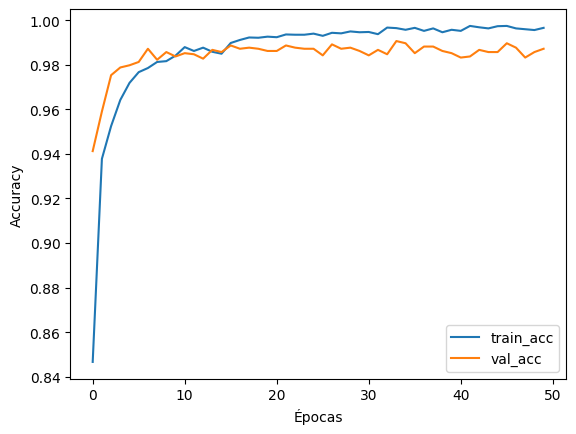

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
model.save('models/1/recommend.keras')